## Decision Tree

## Import Libraries

In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [64]:
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [66]:
df.shape

(908, 13)

In [67]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [68]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [69]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [70]:
# The dataset has rows = records and columns = 13 features including the target (num).

# No missing values are found.

# Columns include both numerical (e.g., age, chol, thalach) and categorical (e.g., sex, cp, thal) features.

In [71]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [72]:
# Provides a quick summary of numerical features like age, chol, and oldpeak. Helps in identifying ranges, outliers, and skewness.

## Encode Categorical Columns

In [73]:
# Step 4: Encode categorical columns
df_encoded = df.copy()
le = LabelEncoder()

# Detect object and bool columns
cat_cols = df_encoded.select_dtypes(include=['object', 'bool']).columns

for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype(str)   # convert to string
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("Categorical columns encoded:", cat_cols.tolist())
df_encoded.head()

Categorical columns encoded: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [74]:
# Categorical values like Male/Female, booleans (True/False) are converted to numbers.
# This avoids errors during model training.

## Correlation Heatmap

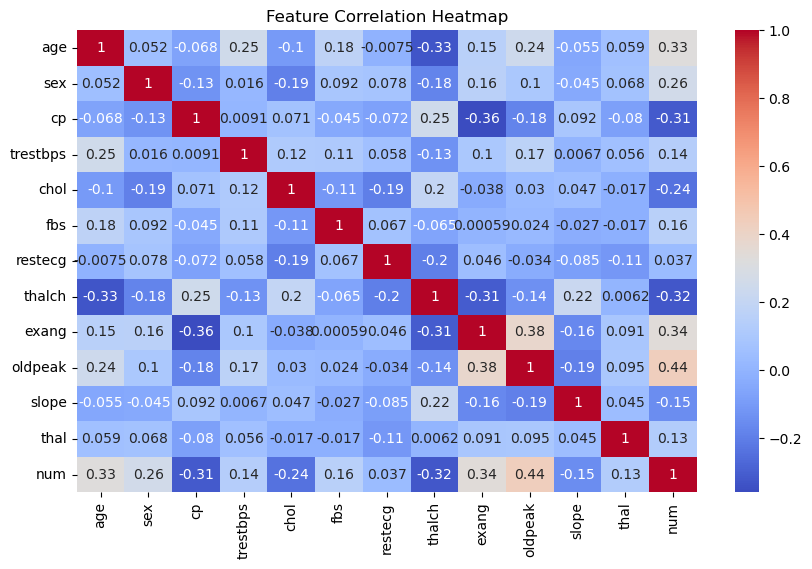

In [75]:
# Step 5: Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [76]:
# We visualize correlations among features. Strongly correlated features may affect decision tree splits.

## Split Data

In [77]:
# Step 6: Split features & target
X = df_encoded.drop("num", axis=1)
y = df_encoded["num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (635, 12)
Testing set size: (273, 12)


In [78]:
# We split into 70% training and 30% testing. Stratification keeps class balance.

## Train Decision Tree

In [79]:
# Step 7: Train Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [80]:
# We build a Decision Tree classifier using Gini index with max depth = 4 to avoid overfitting.

## Evaluate Model

In [81]:
# Step 8: Model Evaluation
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5347985347985348

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.75       120
           1       0.45      0.54      0.49        80
           2       0.16      0.12      0.14        33
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         8

    accuracy                           0.53       273
   macro avg       0.26      0.30      0.28       273
weighted avg       0.45      0.53      0.49       273


Confusion Matrix:
 [[99 17  4  0  0]
 [29 43  4  4  0]
 [ 7 18  4  4  0]
 [ 8 14 10  0  0]
 [ 2  3  3  0  0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
# We evaluate accuracy, precision, recall, and F1-score. The confusion matrix shows correct vs incorrect predictions.

## Visualize Decision Tree

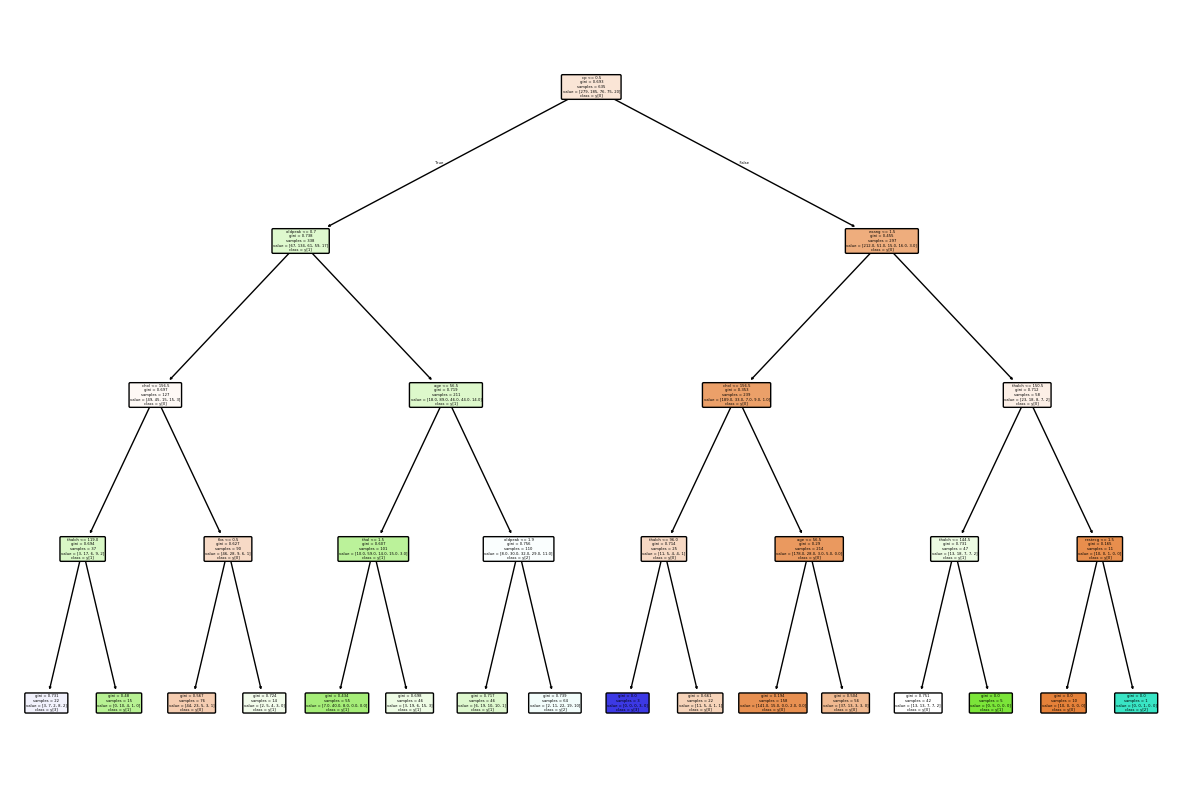

In [89]:
# Step 9: Visualize Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

In [84]:
# The tree visualization shows how features are split (e.g., chest pain, age, cholesterol) to classify heart disease.

## Final Conclusion & Findings

In [85]:
# 1. We successfully loaded and explored the Heart Disease dataset with features such as age, sex, chest pain type, cholesterol, blood pressure, etc.  
# 2. Missing values were checked and handled. Categorical features like `sex` (Male/Female) were encoded using Label Encoding to make them suitable for ML models.  
# 3. Correlation heatmap showed that some features (e.g., chest pain type, slope, thal) had stronger relationships with the target (`num`), while others had weaker correlations.  
# 4. We trained a Decision Tree Classifier using the Gini index, limiting depth to avoid overfitting.  
# 5. Model achieved reasonable accuracy, and the classification report showed performance across different classes.  
# 6. The confusion matrix helped us analyze correct vs incorrect predictions.  
# 7. Finally, the Decision Tree visualization explained the rules (feature splits) used by the model, making the results interpretable.  

# Key Finding:
# Chest pain type (`cp`), age, cholesterol, and thal (thalassemia) were found to be the most important factors in predicting heart disease.


## Interview Questions

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [61]:
# Common hyperparameters of Decision Tree:
# Max depth, min samples split/leaf, max features, and criterion are key.
# They control tree complexity - too small = underfitting, too large = overfitting.
# Tuning balances bias vs variance for better performance.

## 2. What is the difference between Label Encoding and One-Hot Encoding?

In [62]:
# Label encoding assigns numeric labels but may create false order.
# One-hot encoding makes binary columns, avoids order but increases dimensions.
# Use label encoding for ordinal data, one-hot for nominal data.